In [44]:

import urllib
import xml.etree.ElementTree as ET
import urllib
import re
import io, random
import pandas as pd
import time
from datetime import datetime
from sklearn.svm import SVR
import datetime
from skmultiflow.meta import AdaptiveRandomForestRegressor
from skmultiflow.trees import HoeffdingTreeRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import VotingRegressor


In [45]:
df=pd.read_csv('test_complete.csv')

In [46]:
df.head()

,Unnamed: 0,DATE_TIME,PLANT_ID,SCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID.1,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,dA
0,0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0
1,1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0
2,2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0
3,3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0
4,4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,0.0


In [47]:
def pred_svr(x, y, x_test):
    svr_rbf = LinearRegression()
    y_rbf = svr_rbf.fit(np.array(x), np.ravel(y,order='C'))
    return svr_rbf.predict(x_test)

def pred_rff(x, y, x_test):
    arf_reg = AdaptiveRandomForestRegressor(random_state=123456)
    arf_reg.fit(np.array(x), np.ravel(y,order='C'))
    return arf_reg.predict(x_test)
 
def pred_hoe(x, y, x_test):
    #arf_reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
    #arf_reg = linear_model.BayesianRidge()
    arf_reg = DecisionTreeRegressor(random_state=0)
    arf_reg.fit(np.array(x), np.ravel(y,order='C'))
    return arf_reg.predict(x_test)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def algorithms_pred(df):
    x_total = df[["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"]].to_numpy().tolist()
    y_total = df[["dA"]].to_numpy().tolist()
    x = x_total[:len(df)-1]
    y = y_total[:len(df)-1]
    x_test = x_total[len(df)-1:]
    y_test = y_total[len(df)-1:]
    y_pred_svr = pred_svr(x,y,x_test)
    y_pred_rff = pred_rff(x,y,x_test)
    y_pred_hoe = pred_hoe(x,y,x_test)
    
    ereg = VotingRegressor(estimators=[('gb', LinearRegression()), ('rf', AdaptiveRandomForestRegressor(random_state=123456)),
                                       ('lr', DecisionTreeRegressor(random_state=0))])
    ereg = ereg.fit(np.array(x), np.ravel(y,order='C'))
    y_pred_ensemb = ereg.predict(x_test)
    #y_pred_ensemb = (1/3)*np.add(np.add(y_pred_rff,y_pred_svr),y_pred_hoe)
    if(y_test[0][0]!=0):
#         if(y_test[0][0]==0):
#             y_test[0][0]+=1
#             y_pred_hoe[0]+=1
#             y_pred_rff[0]+=1
#             y_pred_svr[0]+=1
            
        print(y_test ,y_pred_svr)    
        MAPE_list.append([y_test[0][0],y_pred_svr[0]])
        MAPE_list2.append([y_test[0][0],y_pred_rff[0]])
        MAPE_list3.append([y_test[0][0],y_pred_hoe[0]])
        MAPE_list_ensemb.append([y_test[0][0],y_pred_ensemb[0]])
        
# def otherAlgorithm(df):
#     x_total = df[["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE","IRRADIATION"]].to_numpy().tolist()
#     y_total = df[["DAILY_YIELD"]].to_numpy().tolist()
#     x = x_total[:len(df)-1]
#     y MAPE_list[:len(df)-1]
#     x_test = x_total[len(df)-1:]
#     y_test = y_total[len(df)-1:]
    
#     if(y_test!=0):
#         MAPE_list2.append([y_test[0][0],y_pred[0]])

In [50]:
def dataprocess(df,start_time):
    dt_start = start_time
    dt_end = datetime.timedelta(0, 900)
    l=0
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
    while(dt_start <=  datetime.datetime(2020, 6, 17, 23, 45) - datetime.timedelta(0, 900)):
        dt_end=dt_start+datetime.timedelta(0,TrainingWindow*time_sampling)
        #print(dt_start,dt_end)
        #print(sensor_list)
        #df = df.set_index(['DATE_TIME'])
        #print(df.loc[dt_start:dt_end])
        
        mask = (df['DATE_TIME'] > dt_start) & (df['DATE_TIME'] <= dt_end)
        df_proc=df.loc[mask]
        print(len(df_proc))
        m=0
        for i in sensor_list:
            msk=(df_proc['SCE_KEY']==i[0])
            df_proc_sen=df_proc.loc[msk]
            #print(len(df_proc_sen),l,m)
            #print(dt_start)
            if(len(df_proc_sen)==0):
                continue
            algorithms_pred(df_proc_sen)
            m+=1
        dt_start +=  datetime.timedelta(0, TrainingWindow*time_sampling)
        l+=1
    
    

In [51]:
#constant parameters
TrainingWindow = 30   #window size is found from historical data
PredictionWindow = 3   #prediction window/prediction horizon
time_sampling = 900 #Should be equal to data refreshing time
sensor_list=df[["SCE_KEY"]].to_numpy().tolist()
sensor_list=sensor_list[0:20]
print(sensor_list)

#main function
if __name__ == '__main__':
    MAPE_list = list()
    MAPE_list2 = list()
    MAPE_list3 = list()
    MAPE_list_ensemb = list()
    date=datetime.datetime(2020, 5, 15, 6, 15)
    
    
    dataprocess(df,date)
    #print(MAPE_list)
    MAPE_npArray = np.array(MAPE_list)
    MAPE_npArray2 = np.array(MAPE_list2)
    MAPE_npArray3 = np.array(MAPE_list3)
    MAPE_npArray_ensemb = np.array(MAPE_list_ensemb)
    #print(MAPE_npArray[:,0])
    mape = MAPE(MAPE_npArray[:,0],MAPE_npArray[:,1])
    mape2 = MAPE(MAPE_npArray2[:,0],MAPE_npArray2[:,1])
    mape3 = MAPE(MAPE_npArray3[:,0],MAPE_npArray3[:,1])
    mape_ensemb = MAPE(MAPE_npArray_ensemb[:,0],MAPE_npArray_ensemb[:,1])
    print("MAPE for linear regression is: "+ str(mape))
    print("MAPE for rff is: "+ str(mape2))
    print("MAPE for decision tree is: "+ str(mape3))
    print("MAPE for ensemble is: "+ str(mape_ensemb))
    list1 = list()
    list1.append(mape)
    list1.append(mape2)
    list1.append(mape3)
    list1.append(mape_ensemb)

[['1BY6WEcLGh8j5v7'], ['1IF53ai7Xc0U56Y'], ['3PZuoBAID5Wc2HD'], ['7JYdWkrLSPkdwr4'], ['McdE0feGgRqW7Ca'], ['VHMLBKoKgIrUVDU'], ['WRmjgnKYAwPKWDb'], ['ZnxXDlPa8U1GXgE'], ['ZoEaEvLYb1n2sOq'], ['adLQvlD726eNBSB'], ['bvBOhCH3iADSZry'], ['iCRJl6heRkivqQ3'], ['ih0vzX44oOqAx2f'], ['pkci93gMrogZuBj'], ['rGa61gmuvPhdLxV'], ['sjndEbLyjtCKgGv'], ['uHbuxQJl8lW7ozc'], ['wCURE6d3bPkepu2'], ['z9Y9gH1T5YWrNuG'], ['zBIq5rxdHJRwDNY']]
660
[[8202.875]] [8775.69791296]
[[8491.4428569]] [8676.32533796]
[[8567.1428569]] [8771.61115355]
[[8477.525]] [8747.57429749]
[[8523.0999999]] [8326.02397188]
[[8774.425]] [9052.40157482]
[[8571.685713899999]] [8923.73865494]
[[8776.942856699998]] [9169.397105]
[[8433.775]] [8378.36244042]
[[8695.8571433]] [8824.39902229]
[[7951.275]] [8600.54954825]
[[8734.9142856]] [8283.53009617]
[[8516.071428899999]] [8558.58084418]
[[8421.014285599998]] [7879.01075712]
[[8371.8142854]] [8219.07753462]
[[8409.285713899997]] [8009.98709187]
[[8832.271428700002]] [7506.26819652]
[[8701

[[9105.225]] [11223.47725022]
[[9832.9625]] [11240.39810153]
[[9561.0875]] [11467.3223742]
[[9500.225]] [10893.85301722]
[[10959.0125]] [9783.2261923]
660
[[122.825]] [365.25116755]
[[132.1375]] [263.83737456]
[[115.2625]] [132.73273144]
[[115.0]] [101.62770419]
[[132.55]] [265.73118047]
[[117.8875]] [95.34971008]
[[114.3375]] [208.98192599]
[[126.70000002999998]] [113.5372891]
[[111.425]] [138.9891903]
[[139.675]] [310.58145917]
[[114.0125]] [264.410019]
[[126.9125]] [139.89357749]
[[125.97142861]] [282.15925833]
[[117.9875]] [148.20248912]
[[93.528571433]] [949.66419038]
[[128.8375]] [289.92103169]
[[131.7375]] [192.228879]
[[131.8625]] [224.00913443]
[[130.625]] [78.20017201]
[[132.4]] [-19.85956195]
576
528
[[9216.6714284]] [9278.72377687]
[[10170.3285713]] [10180.27074683]
[[10186.7714284]] [10302.94102561]
[[9846.628571299998]] [9856.79237486]
[[9995.8571427]] [9995.33705344]
[[10135.0571429]] [10141.14392605]
[[9948.357143]] [10048.44000719]
[[9943.8000003]] [9954.34167049]
[[96

[[2965.2857139000002]] [3075.82359671]
[[3004.4999999]] [3195.05768353]
[[2970.0000003]] [3140.47573316]
[[2972.5]] [3154.89270804]
[[2821.0857141]] [2997.20411042]
660
[[8095.857143000001]] [7270.41627434]
[[8671.75]] [7970.47915674]
[[8871.775]] [7798.24544707]
[[8380.625]] [7679.02583161]
[[8247.05]] [8028.45263323]
[[8298.3625]] [7904.25503056]
[[8772.125]] [7631.67226765]
[[8084.6125]] [8144.54011564]
[[8196.0285713]] [7755.7577036]
[[8915.1375]] [7971.99990344]
[[7676.414286]] [7282.0498055]
[[8122.828570999997]] [8189.53341042]
[[7913.825]] [7980.87616214]
[[7869.1571426]] [7767.49395151]
[[8046.875]] [8126.97776974]
[[7997.6375]] [7916.30459028]
[[7639.4285714]] [8141.71341043]
[[8384.65]] [8123.60369868]
[[8228.9375]] [8012.17652657]
[[8139.585714600002]] [8026.72542013]
588
660
[[327.4625]] [240.26119492]
[[344.8875]] [244.50238436]
[[351.7625]] [256.4826514]
[[339.125]] [246.42622286]
[[353.4125]] [259.84936878]
[[344.0625]] [200.34154596]
[[349.1375]] [252.15401475]
[[349.8

[[400.45714281000005]] [304.6680576]
[[361.3375]] [385.01508788]
[[373.47142860000014]] [349.81739384]
[[390.4]] [458.14879433]
[[389.62857144]] [255.25609491]
[[379.44285714]] [243.09916717]
[[350.0875]] [329.31531855]
[[392.6]] [185.47612391]
[[344.9]] [317.89212319]
[[346.8125]] [337.37587862]
[[360.3428571700002]] [54.1072275]
660
616
[[5484.85]] [5666.82009393]
[[6239.425]] [6132.50930161]
[[6217.4625]] [6134.97992232]
[[5983.625]] [6028.57543806]
[[5939.3]] [6124.07719954]
[[6108.35]] [6193.85159342]
[[6131.125]] [6075.42068886]
[[5917.225]] [6047.08628711]
[[5918.15]] [6004.92723018]
[[6330.5125]] [6192.62841367]
[[5477.4375]] [5661.92500303]
[[5924.7625]] [6136.47879249]
[[5718.125]] [5931.54188097]
[[5952.35]] [5961.8796451]
[[5996.525]] [5984.16223443]
[[5878.7875]] [6011.50602018]
[[5938.7625]] [5991.11351678]
[[5808.7]] [6009.06216223]
[[5740.4875]] [5945.85817962]
[[5821.825]] [5860.1219246]
660
[[1174.4714281]] [1590.21576292]
[[1250.7125]] [1755.62854717]
[[1208.97142870

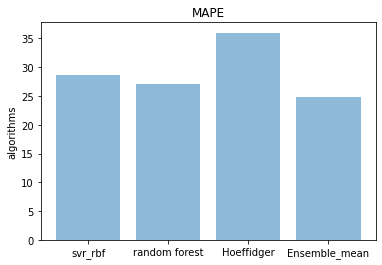

In [52]:
objects = ('svr_rbf', 'random forest', 'Hoeffidger', 'Ensemble_mean')
y_pos = np.arange(len(objects))

plt.bar(y_pos, list1, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('algorithms')
plt.title('MAPE')

plt.show()

In [19]:
a_datetime = datetime.datetime(2010, 1, 1)

added_seconds = datetime.timedelta(0, 900)
#Time delta of 25 seconds

new_datetime = datetime.datetime(2020, 6, 17, 23, 45)

#Add time delta to `a_datetime`


print(new_datetime)

2020-06-17 23:45:00


In [52]:
print(mape)

36828.65896071801


In [123]:
for i in range(len(MAPE_list3)):
    print(MAPE_list3[i][0],MAPE_list3[i][1])

8202.875 7932.220517879998
7453.442857600003 8070.076964466006
12531.242856 10414.238482142006
118.55 304.70000004000025
1808.4 1767.5634640470003
2884.9428569 3619.2677678630016
3214.3285714000003 2603.612499999995
6068.4857146 6288.321392787001
458.975 102.87085713888
12437.566663 12631.086516179983
10716.175 11778.171643051
7135.4625 11744.591513844027
122.825 299.3571428600005
9216.6714284 8577.162499999984
4040.5857143 5849.516089287997
4279.4125 3419.5571431000076
5978.325 8405.431071565996
412.35 0.0
11869.042853 11785.83200019998
13681.285711000002 13004.125893063981
6225.45 8352.984660418011
137.6 292.30000003000066
9124.225 8527.4999999
3920.8857141000003 4283.808161082995
2812.9285717 2306.725000000004
8095.857143000001 7200.012892781999
327.4625 69.86499999910984
11971.7 11211.448071603012
8652.2714289 10421.745999763005
8855.799999899999 6556.040285671011
95.87142857299999 236.71250000000026
4481.4857147 3533.287499999997
9801.014286 10614.654071651008
337.7875 56.22857143

In [109]:
print(df)

      Unnamed: 0           DATE_TIME  PLANT_ID          SCE_KEY  DC_POWER  \
0              0 2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0   
1             21 2020-05-15 00:15:00   4135001  1BY6WEcLGh8j5v7       0.0   
2             42 2020-05-15 00:30:00   4135001  1BY6WEcLGh8j5v7       0.0   
3             63 2020-05-15 00:45:00   4135001  1BY6WEcLGh8j5v7       0.0   
4             84 2020-05-15 01:00:00   4135001  1BY6WEcLGh8j5v7       0.0   
...          ...                 ...       ...              ...       ...   
3149       68664 2020-06-17 22:45:00   4135001  1BY6WEcLGh8j5v7       0.0   
3150       68686 2020-06-17 23:00:00   4135001  1BY6WEcLGh8j5v7       0.0   
3151       68708 2020-06-17 23:15:00   4135001  1BY6WEcLGh8j5v7       0.0   
3152       68730 2020-06-17 23:30:00   4135001  1BY6WEcLGh8j5v7       0.0   
3153       68752 2020-06-17 23:45:00   4135001  1BY6WEcLGh8j5v7       0.0   

      AC_POWER  DAILY_YIELD  TOTAL_YIELD  PLANT_ID.1       SOURCE_KEY  \
0 